In [7]:
import time
import email

import os; 
from os import listdir
from os.path import join, isdir

import pandas as pd
import swifter

import matplotlib.pyplot as plt

path = "/media/becode/3D_House/Enron_CSV/"

In [134]:
reduced = pd.read_csv(join(path, "reduced_mails_FINAL.csv"), index_col=0)

In [145]:
reduced["X-Folder"].apply(lambda x: x.split("\\")[1:]).value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Kay_Mann_June2001_2, Notes Folders, Discussion threads]                     4956
[Vincent_Kaminski_Jun2001_2, Notes Folders, Discussion threads]              3965
[Jeff_Dasovich_June2001, Notes Folders, Notes inbox]                         3473
[Steven_Kean_June2001_4, Notes Folders, Discussion threads]                  3414
[kate symes 6-27-02, Notes Folders, Discussion threads]                      3064
                                                                             ... 
[Michelle_Cash_Dec2000, Notes Folders, Meeting invites_confirms]                1
[Sara_Shackleton_Dec2000_June2001_1, Notes Folders, Guaranties]                 1
[Sara_Shackleton_Dec2000_June2001_1, Notes Folders, Confirms - hickerson]       1
[Mark_Haedicke_Dec2000_2, Notes Folders, Notes inbox]                           1
[Sara_Shackleton_Dec2000_June2001_2, Notes Folders, Jeff nogid]                 1
Name: X-Folder, Length: 4056, dtype: int64

In [161]:
sent_idxs = reduced[reduced["X-Folder"].apply(lambda x: "Sent" in x)].index

In [164]:
sent_emotional = emotional.loc[sent_idxs]

In [35]:
emotional  = pd.read_csv(join(path, "emotional_content.csv"), index_col=0)
#emotional2 = pd.read_csv(join(path, "emotional_words.csv"), index_col=0)

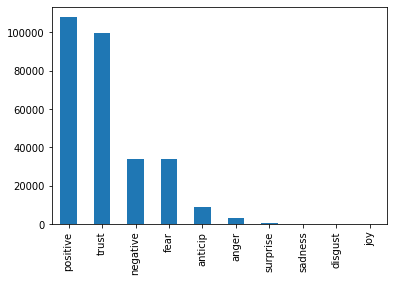

In [3]:
emotional["topemotion"].value_counts(
).plot(kind="bar")

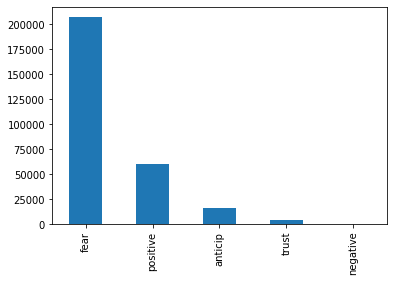

In [4]:
emotional2["topemotion"].value_counts(
).plot(kind="bar")

In [12]:
emotional["month"] = emotional["Date"].swifter.apply(lambda x: pd.to_datetime(x).month)

In [133]:
emotion_keys=[
    'fear', 'anger', 'anticip', 
    'trust', 'surprise', 'positive', 
    'negative', 'sadness', 'disgust', 
    'joy'
]
emotional.loc[emotional[emotion_keys].idxmax()]

,Content,Author,Date,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,topemotion
325203,Credit Support Annex and Paragraph 13,bailey-s,2001-04-04 07:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fear
298188,Attached are redlines of the revised docs. Th...,nemec-g,2000-06-23 08:46:00,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,anger
254880,Thanks for representing Matt.\n\nPhillip,allen-p,2001-01-10 22:57:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anticip
26528,i'm blaming my p&l on you today,arnold-j,2001-09-06 09:06:42,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,trust
510340,http://health.yahoo.com/health/dc/003688/0.htm...,bass-e,2001-10-11 06:57:56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,surprise
255231,Anytime after 3 p.m.,allen-p,2000-07-07 06:41:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,positive
24877,lumber,arnold-j,2000-10-25 01:22:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,negative
254752,vishal resigned today,allen-p,2000-01-31 06:21:00,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,negative
390196,Here is the estimated imbalance through Oct. 2...,blair-l,2001-10-26 11:36:49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,disgust
388821,\t\n\tDid you receive?,blair-l,2001-09-04 07:30:34,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,positive


In [41]:
df = pd.concat([
    emotional.groupby("Author")[emotion].sum() 
    for emotion in emotion_keys
]); df

Author
allen-p        134.346552
arnold-j       251.048343
arora-h         48.772561
badeer-r        30.612093
bailey-s        44.620465
                  ...    
williams-w3    317.928322
wolfe-j         92.244638
ybarbo-p        99.993498
zipper-a       130.101685
zufferli-j      51.438515
Length: 1500, dtype: float64

In [289]:
import json

with open("emotion_lookup.json", "w") as file:
    emotion_lookup = {
        author: {
            emotion: sent_emotional[sent_emotional["Author"]== author][emotion].sum()
            for emotion in emotion_keys
        } for author in sorted(sent_emotional["Author"].unique())    
    } ;json.dump(emotion_lookup, file)

In [53]:
import json

with open("emotion_lookup.json", "r") as file:
    emotion_lookup = json.load(open("emotion_lookup.json"))

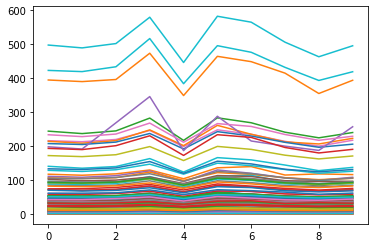

In [54]:
for author in emotion_lookup:
    plt.plot(list(emotion_lookup[author].values()))


In [57]:
min_max =   lambda x: (min(x), max(x))
total =     lambda x, low: sum(x) - len(x)*low
normalize = lambda x, low, high: (x-low)/(high-low)
floor =     lambda x, low: x -low
percent =   lambda x, total: x /total *100

for author in emotion_lookup:
    low, high = min_max(emotion_lookup[author].values())

    emotion_lookup[author] = { 
        key: percent(floor(val, low), total(emotion_lookup[author].values(),0)) 
        for key, val in emotion_lookup[author].items()
    }

In [150]:
emotion_colors = ["k", "red", "purple", "c", "yellow", "lightgray", "black", "blue", "green", "orange"]

In [19]:
len(emotion_lookup.keys())

144

In [59]:
sum(emotion_lookup["allen-p"].values())

100.0

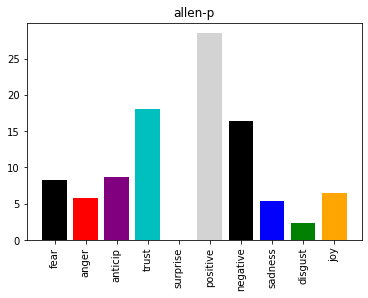

In [151]:
for employ in sorted(emotion_lookup.keys())[:1]:
    plt.bar(emotion_lookup[employ].keys(),
            emotion_lookup[employ].values(),
            color=emotion_colors)
    plt.xticks(rotation=90)
    plt.title(employ); plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

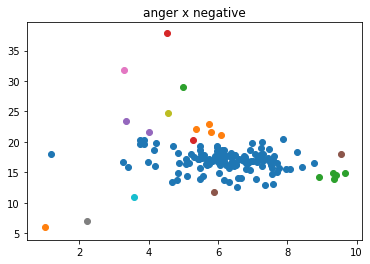

In [146]:
df = pd.DataFrame(list(zip(
    [emotion_lookup[auth]["anger"] 
     for auth in emotion_lookup], 
    [emotion_lookup[auth]["negative"]
     for auth in emotion_lookup])))

model = DBSCAN(eps=1, min_samples=1).fit(df)
df["label"] = model.fit_predict(df)

for idx, group in enumerate({
    group: df[df.label == group] 
    for group in df["label"].unique()
}):
    data = df[df.label == idx]
    plt.scatter(data[0], data[1])

plt.title("anger x negative"); plt.show()

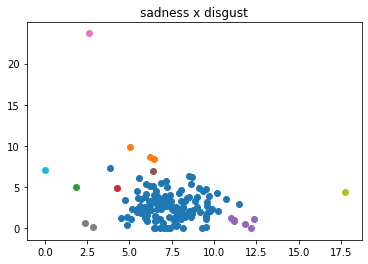

In [121]:
df = pd.DataFrame(list(zip(
    [emotion_lookup[auth]["sadness"] 
     for auth in emotion_lookup], 
    [emotion_lookup[auth]["disgust"]
     for auth in emotion_lookup])))

model = DBSCAN(eps=1, min_samples=1).fit(df)
df["label"] = model.fit_predict(df)

for idx, group in enumerate({
    group: df[df.label == group] 
    for group in df["label"].unique()
}):
    data = df[df.label == idx]
    plt.scatter(data[0], data[1])
    
plt.title("sadness x disgust"); plt.show()

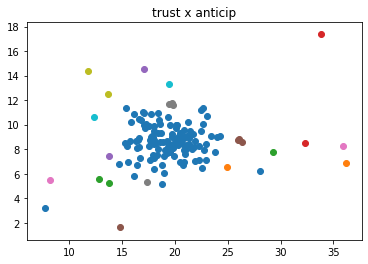

In [152]:
df = pd.DataFrame(list(zip(
    [emotion_lookup[auth]["trust"] 
     for auth in emotion_lookup], 
    [emotion_lookup[auth]["anticip"]
     for auth in emotion_lookup])))

model = DBSCAN(eps=1, min_samples=1).fit(df)
df["label"] = model.fit_predict(df)

for idx, group in enumerate({
    group: df[df.label == group] 
    for group in df["label"].unique()
}):
    data = df[df.label == idx]
    plt.scatter(data[0], data[1])
    
plt.title("trust x anticip"); plt.show()

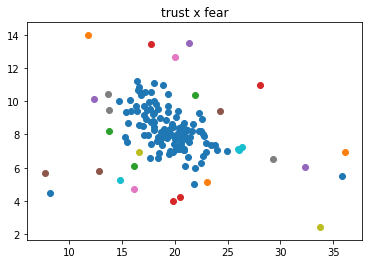

In [124]:
df = pd.DataFrame(list(zip(
    [emotion_lookup[auth]["trust"] 
     for auth in emotion_lookup], 
    [emotion_lookup[auth]["fear"]
     for auth in emotion_lookup])))

model = DBSCAN(eps=1, min_samples=1).fit(df)
df["label"] = model.fit_predict(df)

for idx, group in enumerate({
    group: df[df.label == group] 
    for group in df["label"].unique()
}):
    data = df[df.label == idx]
    plt.scatter(data[0], data[1])
    
plt.title("trust x fear"); plt.show()

In [42]:
for author in sorted(emotional["Author"].unique())[:1]:
    sum_df = emotional[emotional["Author"]== author].sum()
    print(sum_df)

Content       ---------------------- Forwarded by Phillip K ...
Author        allen-pallen-pallen-pallen-pallen-pallen-palle...
Date          2000-09-01 06:08:001999-12-10 07:00:002000-02-...
fear                                                    134.347
anger                                                   130.145
anticip                                                 135.429
trust                                                   151.647
surprise                                                 119.38
positive                                                160.996
negative                                                146.985
sadness                                                 131.014
disgust                                                 123.576
joy                                                     130.481
topemotion    trusttrusttrusttrustpositivepositiveangernegat...
dtype: object


[8.261632472952472, 5.731062905396407, 8.729932559455857, 18.048482938158333, 0.0, 28.529588167317876, 16.39193358941384, 5.441851701210478, 2.3289229403596394, 6.5365927257350895]


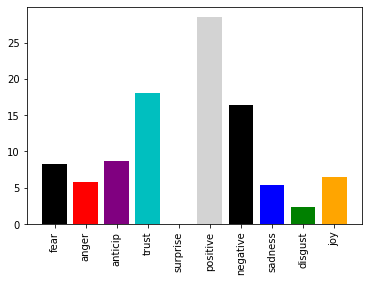

In [147]:
dct = emotion_lookup["allen-p"]
print(list(dct.values()))
plt.bar(dct.keys(), dct.values(),
       color=emotion_colors)
plt.xticks(rotation=90)
plt.show()

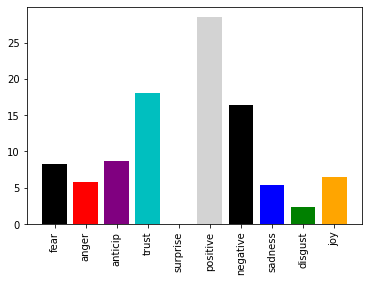

In [148]:
plt.bar(
    emotion_lookup["allen-p"].keys(),
    list(map(
        lambda x: floor(x, low),
        emotion_lookup["allen-p"].values()
    )) ,color=emotion_colors)

plt.xticks(rotation=90)
plt.show()

[]

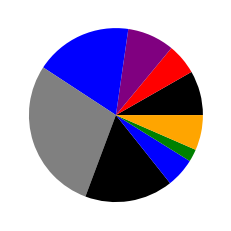

In [339]:
plt.pie(emotion_lookup["allen-p"].values(), colors=emotion_colors)
plt.plot()

0
1
2
3
4
5


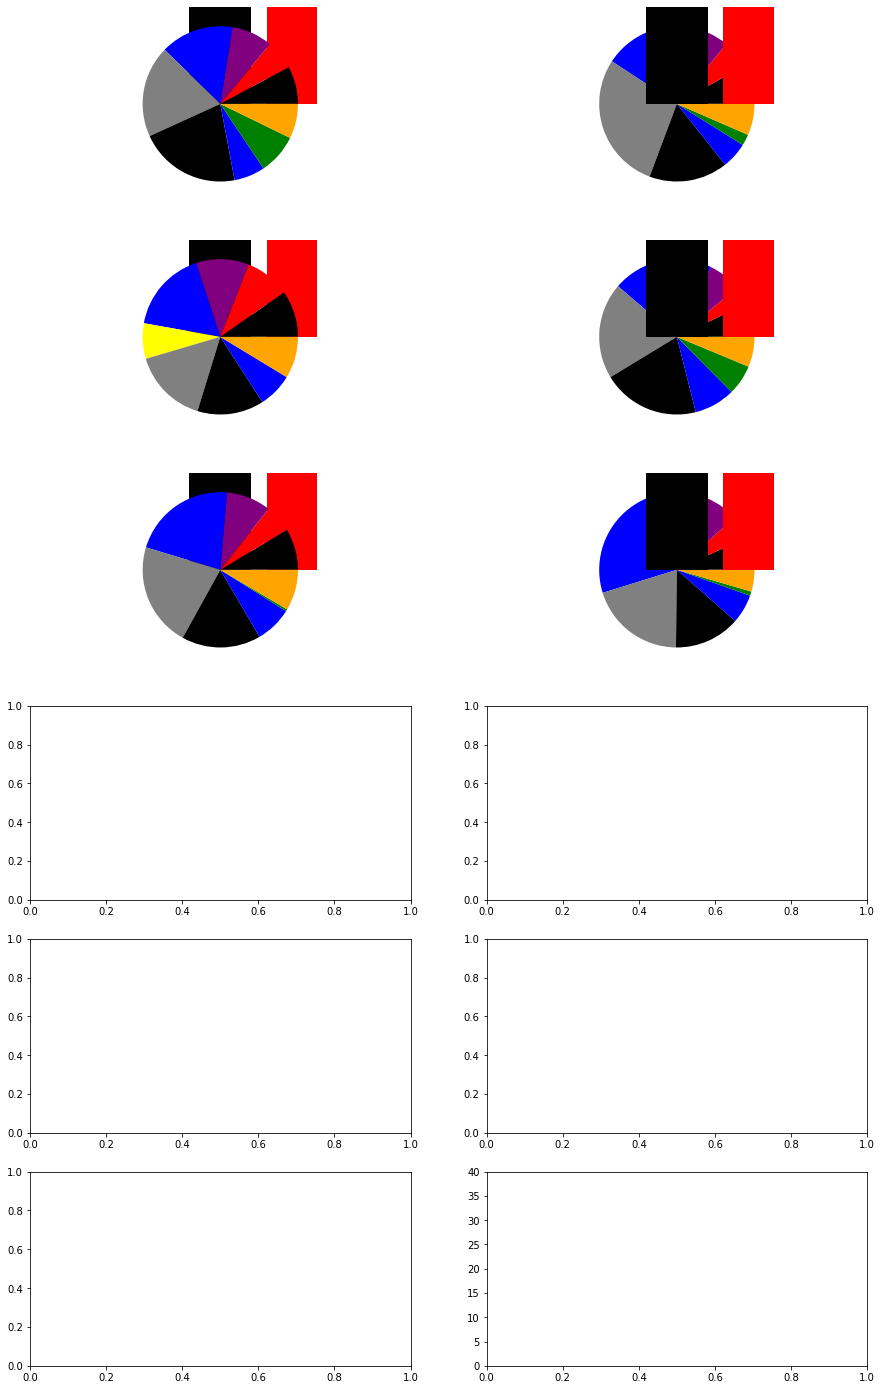

In [379]:
fig, ax = plt.subplots(ncols=2,nrows=6, figsize=(15,25))
for idx, author in enumerate(list(emotion_lookup)[:6]):
    print(idx)
    ax[idx//2][idx%2].bar(
        emotion_lookup[author].keys(),
        emotion_lookup[author].values(), 
        color=emotion_colors)
    ax[idx//2][~idx%2].pie(
        emotion_lookup[author].values(),
        colors=emotion_colors)
    plt.ylim(0, 40)
plt.show()

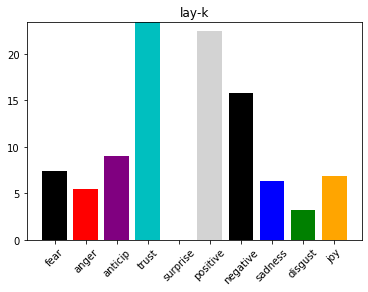

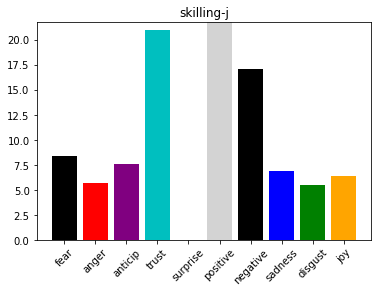

In [149]:
def plot_emotions(author):
    plt.bar(
        emotion_keys, 
        list(emotion_lookup[author].values()),
        color = emotion_colors
    )
    plt.title(author)
    plt.xticks(rotation=45)
    plt.ylim(
        min(emotion_lookup[author].values()),
        max(emotion_lookup[author].values())
    )
    plt.show()
    
for author in ["lay-k", "skilling-j"]:
    plot_emotions(author)

In [1]:
for author in list(emotion_lookup)[:100]:
    plot_emotions(author)

NameError: name 'emotion_lookup' is not defined

In [177]:
sent_emotional[sent_emotional["Author"]=="griffith-j"]

,Content,Author,Date,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,topemotion
310406,Everything is going okay. Dynegy has bought u...,griffith-j,2001-11-16 06:54:50,0.094994,0.096277,0.100128,0.107831,0.087291,0.114249,0.112965,0.093710,0.094994,0.097561,positive
310402,Thank you.\n\nJohn\n\n -----Original Message--...,griffith-j,2001-11-16 08:46:29,0.096552,0.096552,0.096552,0.096552,0.096552,0.103448,0.110345,0.096552,0.110345,0.096552,negative
310405,That is great thank you. I enjoyed you here. ...,griffith-j,2001-11-02 05:27:28,0.101149,0.103448,0.098851,0.105747,0.087356,0.108046,0.110345,0.094253,0.096552,0.094253,negative
310409,"Carlos, give me a call today (Friday) when you...",griffith-j,2001-11-02 05:28:14,0.088235,0.088235,0.088235,0.088235,0.088235,0.117647,0.117647,0.088235,0.117647,0.117647,positive
310389,"John,\n\nThank you for pulling me aside and re...",griffith-j,2001-12-10 08:10:00,0.099502,0.092869,0.099502,0.104478,0.091211,0.111111,0.107794,0.096186,0.092869,0.104478,positive
310398,"\n\n -----Original Message-----\nFrom: \t""bila...",griffith-j,2001-12-17 06:42:12,0.101449,0.092754,0.092754,0.107246,0.095652,0.107246,0.115942,0.092754,0.098551,0.095652,negative
310395,"\n\n -----Original Message-----\nFrom: \tHuan,...",griffith-j,2001-12-17 06:42:47,0.096591,0.098011,0.100852,0.100852,0.096591,0.107955,0.105114,0.093750,0.100852,0.099432,positive
310392,"Thanks Greg, I think it fixed it. Have a wond...",griffith-j,2001-11-19 06:18:48,0.104089,0.091698,0.091698,0.101611,0.089219,0.104089,0.115242,0.104089,0.106568,0.091698,negative
310401,"Antonio, \n\nI am John Griffith, I sit next to...",griffith-j,2001-11-19 07:35:50,0.099010,0.099010,0.089109,0.099010,0.089109,0.099010,0.128713,0.089109,0.118812,0.089109,negative
310408,"hey rob, try this, call me with any questions....",griffith-j,2001-09-24 06:15:56,0.098131,0.098131,0.098131,0.102804,0.084112,0.102804,0.112150,0.098131,0.107477,0.098131,negative


In [178]:
from textblob import TextBlob

In [193]:
reduced.loc[310402, "Subject"]

'RE: detail of report rsr0503_cons'

In [16]:
emotional.loc[298188, "Content"]

'Attached are redlines of the revised docs.  They are redlined against the \nversions NNG reviewed earlier.\n'

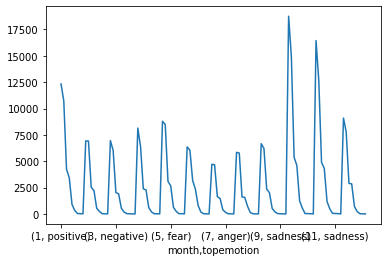

In [14]:
emotional.groupby("month")["topemotion"].value_counts().plot()

In [40]:
emotional.columns[3:-2]

Index(['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative',
       'sadness', 'disgust', 'joy'],
      dtype='object')

1 took 0.1 seconds.
2 took 0.05 seconds.
3 took 0.05 seconds.
4 took 0.05 seconds.
5 took 0.06 seconds.
6 took 0.05 seconds.
7 took 0.04 seconds.
8 took 0.04 seconds.
9 took 0.05 seconds.
10 took 0.11 seconds.
11 took 0.1 seconds.
12 took 0.06 seconds.
Total time: 0.01 minutes.


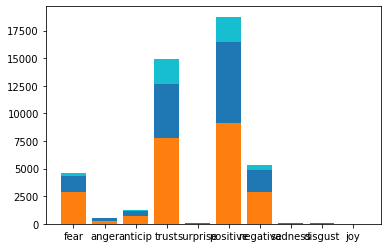

In [53]:
abs_start = start = time.time()
for month in sorted(emotional["month"].unique()):
    series = emotional[emotional["month"]==month]["topemotion"]
    dct = {key: series.apply(lambda x:x==key).sum() for key in emotional.columns[3:-2]}
    
    plt.bar(emotional.columns[3:-2], dct.values())
    #plt.bar(month, emotional[emotional["month"]==month]["topemotion"].value_counts())
    
    print(month, "took", round(time.time() -start, 2), "seconds.")
    start = time.time()
print("Total time:", round((time.time() -abs_start)/60, 2), "minutes.")
plt.show()

KeyError: 'month'

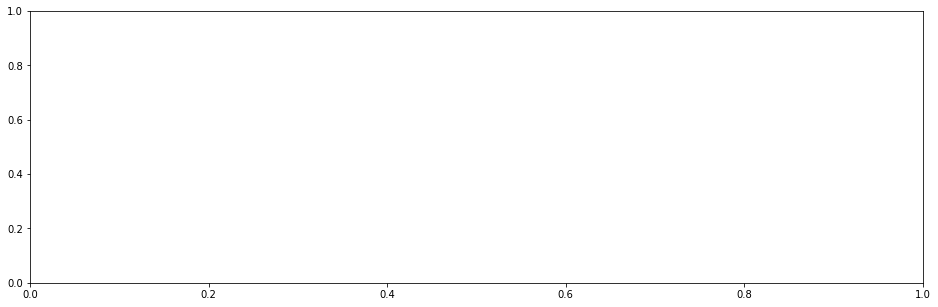

In [64]:
fig, ax = plt.subplots(figsize=(16,5))
emotional.groupby("month")["topemotion"].value_counts().plot()